# Lab 2.06 - Univariate Analysis

## Exercise 6 - Android Persistence

Import all necessary Python libraries and load the Android Persistence dataset from lab exercise 1.02.  Do not forget the conversion to categorical variables. Define an order in case of an ordinal variable.

In [1]:
# Importing the necessary packages
import numpy as np                                  # "Scientific computing"
import scipy.stats as stats                         # Statistical tests

import pandas as pd                                 # Data Frame
from pandas.api.types import CategoricalDtype

import matplotlib.pyplot as plt                     # Basic visualisation
from statsmodels.graphics.mosaicplot import mosaic  # Mosaic diagram
import seaborn as sns                               # Advanced data visualisation

/tmp/ipykernel_2378/48876594.py:5: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd                                 # Data Frame


Visualise the variables `DataSize` and `PersistenceType` separately using a suitable chart type.

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/JelleLeus1996/data_science/main/data/android_persistence_cpu.csv", delimiter=';')
data.head(5)

,Time,PersistenceType,DataSize
0,1.81,Sharedpreferences,Small
1,1.35,Sharedpreferences,Small
2,1.84,Sharedpreferences,Small
3,1.54,Sharedpreferences,Small
4,1.81,Sharedpreferences,Small


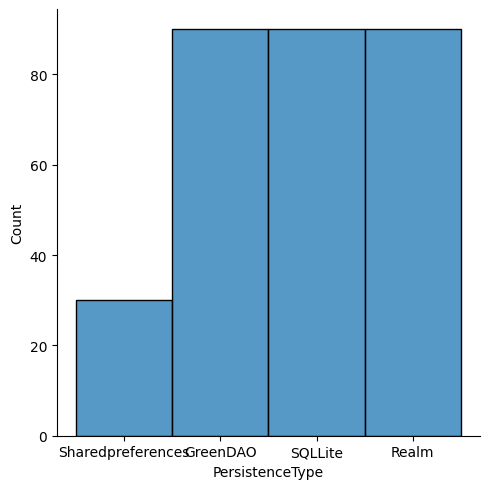

In [3]:
sns.displot(x = data['PersistenceType'], bins = 11)

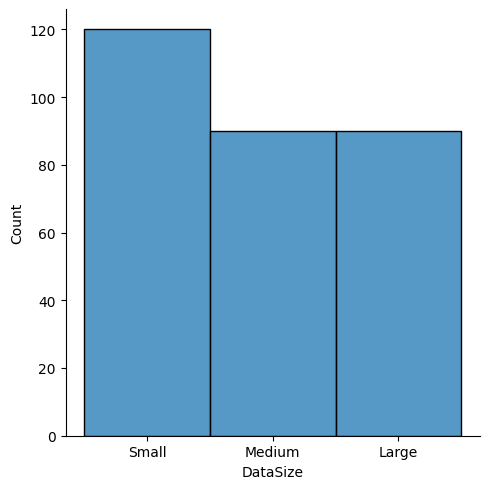

In [4]:
sns.displot(x = data['DataSize'], bins = 11)

How often does each combination of `DataSize` and `PersistenceType` occur? Show the frequencies of `PersistenceType` (parameter `hue`), grouped according to `DataSize` (parameter `x`). Try it the other way round too!

In [5]:
frequency_df = data.groupby(['DataSize', 'PersistenceType']).size().reset_index(name='Frequency')

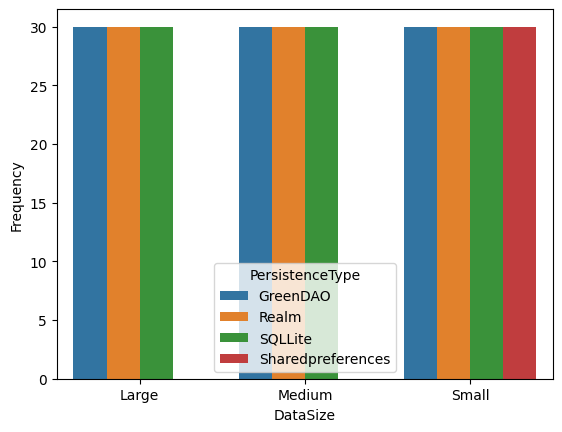

In [6]:
sns.barplot(data=frequency_df, x='DataSize', y='Frequency', hue='PersistenceType')
plt.show()

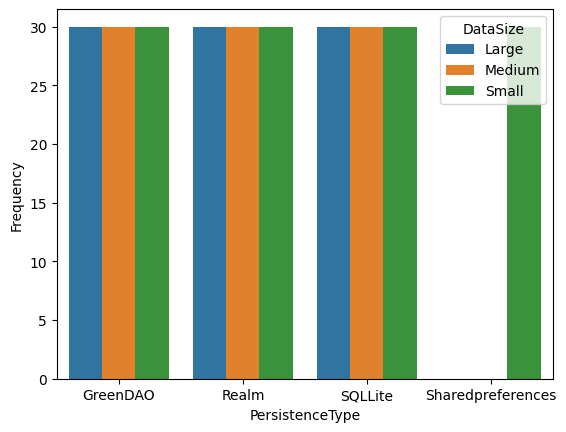

In [7]:
sns.barplot(data=frequency_df, x='PersistenceType', y='Frequency', hue='DataSize')
plt.show()

Visualise the variable `Time` with a boxplot, each time with more detail. Do you notice how you get a better view of the data each time you do this?

- First over the entire dataset (parameter `x`)
- Then grouped according to `DataSize` (parameter `y`)
- Finally, split it according to `PersistenceType` (parameter `hue`)

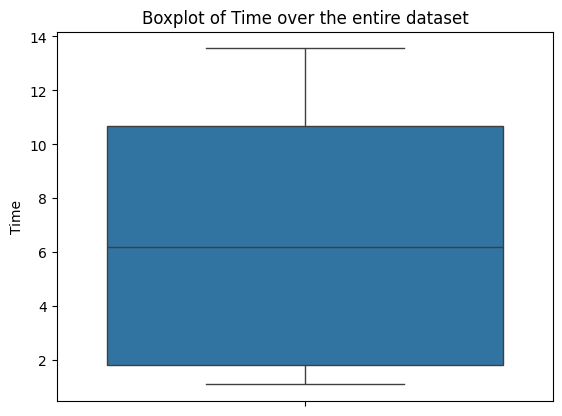

In [12]:
sns.boxplot(y=data['Time'])
plt.title('Boxplot of Time over the entire dataset')
plt.show()

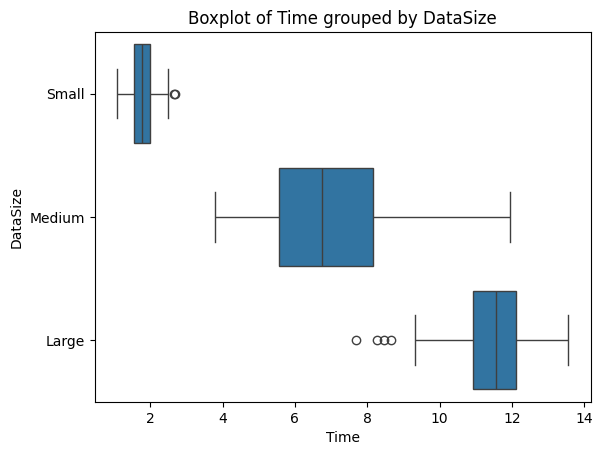

In [11]:
sns.boxplot(y=data['DataSize'], x=data['Time'])
plt.title('Boxplot of Time grouped by DataSize')
plt.show()

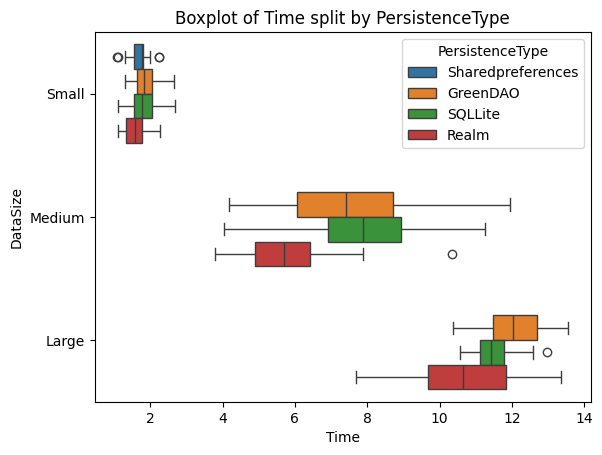

In [13]:
sns.boxplot(y=data['DataSize'], x=data['Time'], hue=data['PersistenceType'])
plt.title('Boxplot of Time split by PersistenceType')
plt.show()

**(Challenge)** Try to do something similar with a density graph: for each value of `DataSize`, show a scatter diagram showing a density graph of the variable `Time` for each value of `PersistenceType` (tip: `sns.FacetGrid()`). The result may look something like this:

![Density graphs for each `DataSize`, comparing the performance of different `PersistenceTypes`](img/persistence-density.png)

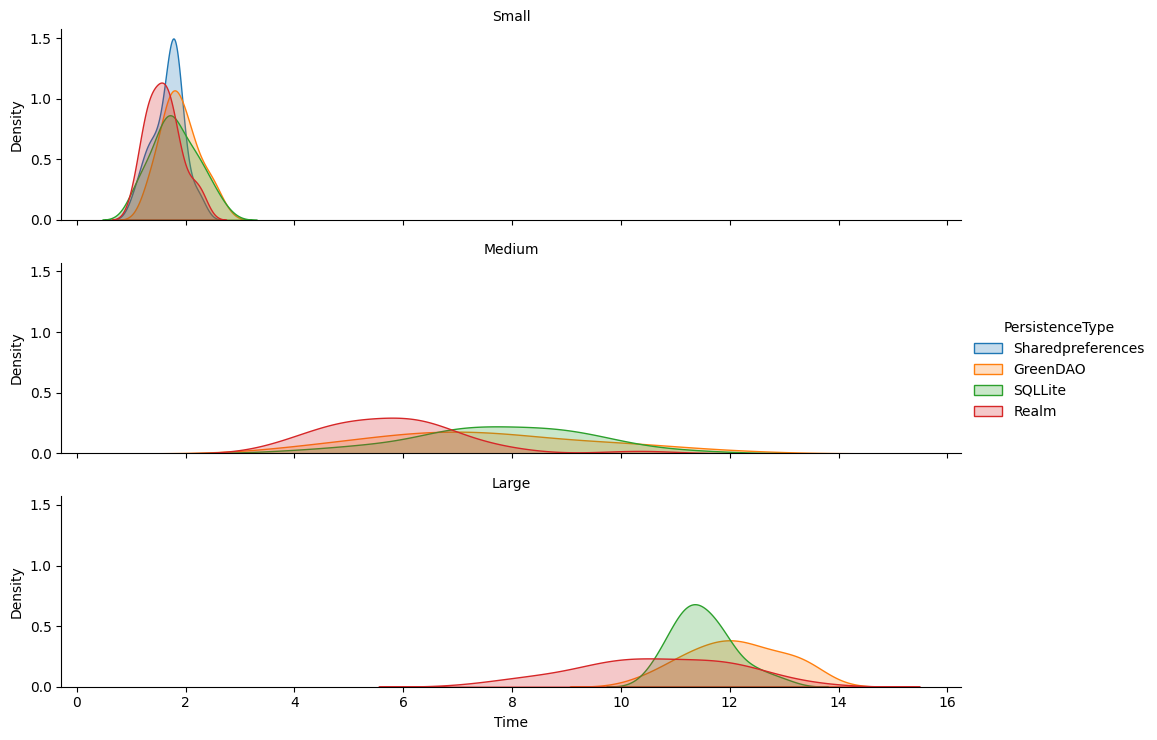

In [16]:

# Create a FacetGrid with DataSize as rows and PersistenceType as hue
g = sns.FacetGrid(df, row='DataSize', hue='PersistenceType', aspect=4, height=2.5)

# Map the kdeplot onto each facet
g.map(sns.kdeplot, 'Time', shade=True)

# Add a legend
g.add_legend()

# Set the titles for each facet
g.set_titles(row_template='{row_name}', col_template='{col_name}')

# Show the plot
plt.show()
#'aspect' controls the width of each facet, 
# height controls the height, and fill=True fills the area under the density curve

Calculate sample mean and standard deviation of `Time`.

- Across the whole dataset
- Broken down according to `DataSize`
- Broken down according to `PersistenceType`
- Broken down according to `DataSize` and `PersistenceType`

In [23]:
print(data.Time.mean())
print(data.Time.std())

# Broken down according to DataSize
mean_time_datasize = data.groupby('DataSize')['Time'].mean()
std_time_datasize = data.groupby('DataSize')['Time'].std()
print("Mean of Time broken down by DataSize:")
print(mean_time_datasize)
print("\nStandard Deviation of Time broken down by DataSize:")
print(std_time_datasize)
print()

# Broken down according to PersistenceType
mean_time_persistencetype = data.groupby('PersistenceType')['Time'].mean()
std_time_persistencetype = data.groupby('PersistenceType')['Time'].std()
print("Mean of Time broken down by PersistenceType:")
print(mean_time_persistencetype)
print("\nStandard Deviation of Time broken down by PersistenceType:")
print(std_time_persistencetype)
print()

# Broken down according to DataSize and PersistenceType
mean_time_both = data.groupby(['DataSize', 'PersistenceType'])['Time'].mean()
std_time_both = data.groupby(['DataSize', 'PersistenceType'])['Time'].std()
print("Mean of Time broken down by DataSize and PersistenceType:")
print(mean_time_both)
print("\nStandard Deviation of Time broken down by DataSize and PersistenceType:")
print(std_time_both)


6.230833333333333
4.229598639871586
Mean of Time broken down by DataSize:
DataSize
Large     11.425667
Medium     7.022000
Small      1.741333
Name: Time, dtype: float64

Standard Deviation of Time broken down by DataSize:
DataSize
Large     1.163785
Medium    1.864335
Small     0.358625
Name: Time, dtype: float64

Mean of Time broken down by PersistenceType:
PersistenceType
GreenDAO             7.152667
Realm                6.022889
SQLLite              7.036000
Sharedpreferences    1.673667
Name: Time, dtype: float64

Standard Deviation of Time broken down by PersistenceType:
PersistenceType
GreenDAO             4.385917
Realm                3.884175
SQLLite              4.146336
Sharedpreferences    0.285192
Name: Time, dtype: float64

Mean of Time broken down by DataSize and PersistenceType:
DataSize  PersistenceType  
Large     GreenDAO             12.110333
          Realm                10.651667
          SQLLite              11.515000
Medium    GreenDAO              7.454000
 

## Expected results

As a check, you can find the expected results here (max. 3 decimal places):

| Statistic         | Mean   | Standard deviation |
| :---------------- | :----- | :----------------- |
| Whole dataset     | 6.231  | 4.230              |
| Small             | 1.741  | 0.359              |
| Medium            | 7.022  | 1.864              |
| Large             | 11.426 | 1.164              |
| GreenDAO          | 7.152  | 4.386              |
| Realm             | 6.023  | 3.884              |
| SQLite            | 7.036  | 4.146              |
| SharedPreferences | 1.674  | 0.285              |

Split on both criteria:

| Sample mean       | Small | Medium | Large  |
| :---------------- | :---- | :----- | :----- |
| GreenDAO          | 1.894 | 7.454  | 12.110 |
| Realm             | 1.599 | 5.818  | 10.652 |
| SQLite            | 1.799 | 7.794  | 11.515 |
| SharedPreferences | 1.674 | -      | -      |

| Standard deviation | Small | Medium | Large |
| :----------------- | :---- | :----- | :---- |
| GreenDAO           | 0.348 | 2.007  | 0.868 |
| Realm              | 0.315 | 1.331  | 1.406 |
| SQLite             | 0.416 | 1.599  | 0.559 |
| SharedPreferences  | 0.285 | -      | -     |
